<a href="https://colab.research.google.com/github/azal17/encoder/blob/main/digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter binary data: 11011010
Input Data Stream: 11011010
Longest Palindrome: 101101
Choose encoding scheme (L for NRZ-L, I for NRZ-I, M for Manchester, DM for Differential Manchester, AMI for AMI): AMI
Do you want to apply scrambling for AMI encoding? (Y/N): y
Choose scrambling type (B8ZS or HDB3): b8zs


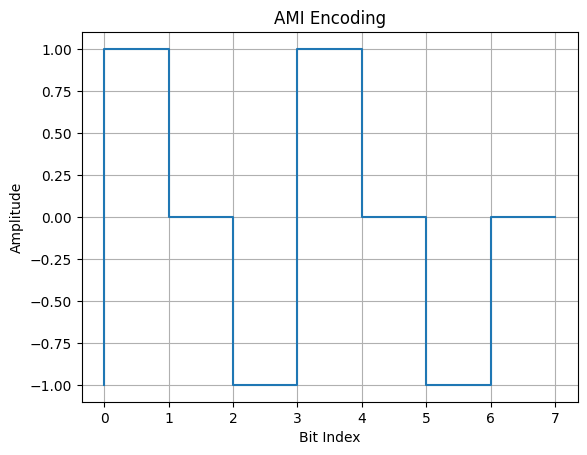

In [3]:
import matplotlib.pyplot as plt

def nrz_l_encoding(data):
    return [-1 if bit == '0' else 1 for bit in data]

def nrz_i_encoding(data):
    encoded_signal, level = [], 1
    for bit in data:
        encoded_signal.append(level) if bit == '0' else encoded_signal.append(level * -1)
        level *= -1 if bit == '1' else 1
    return encoded_signal

def manchester_encoding(data):
    return [ [-1, 1] if bit == '0' else [1, -1] for bit in data]

def differential_manchester_encoding(data):
    encoded_signal, last_bit = [], '0'
    for bit in data:
        if bit == '0':
            encoded_signal.extend([-1, 1])
            last_bit = '0'
        else:
            encoded_signal.extend([1, -1]) if last_bit == '0' else encoded_signal.extend([-1, 1])
            last_bit = '1' if last_bit == '0' else '0'
    return encoded_signal

def ami_encoding(data, scramble=False, scramble_type=None):
    encoded_signal, level = [], 1
    for bit in data:
        encoded_signal.append(0) if bit == '0' else encoded_signal.append(level * -1)
        level *= -1 if bit == '1' else 1

    if scramble and scramble_type == 'B8ZS':
        for i in range(len(encoded_signal) - 7):
            if all(encoded_signal[i:i + 8] == [0, 0, 0, 0, 0, 0, 0, 0]):
                encoded_signal[i + 4:i + 8] = [1, 1, 1, -1]
    elif scramble and scramble_type == 'HDB3':
        for i in range(len(encoded_signal) - 3):
            if all(encoded_signal[i:i + 4] == [0, 0, 0, 0]):
                encoded_signal[i + 3] = -encoded_signal[i + 3] if sum(encoded_signal[i:i + 3]) % 2 == 0 else encoded_signal[i + 3]
            elif encoded_signal[i:i + 4] == [0, 0, 0, 1]:
                encoded_signal[i + 3] = -encoded_signal[i + 3]

    return encoded_signal

def print_palindrome(data):
    print("Input Data Stream:", data)
    longest_palindrome = max((data[i:j + 1] for i in range(len(data)) for j in range(i, len(data)) if data[i:j + 1] == data[i:j + 1][::-1]), key=len)
    print("Longest Palindrome:", longest_palindrome)

def main():
    data = input("Enter binary data: ")
    print_palindrome(data)
    encoding_scheme = input("Choose encoding scheme (L for NRZ-L, I for NRZ-I, M for Manchester, DM for Differential Manchester, AMI for AMI): ")

    if encoding_scheme.upper() == 'L':
        encoded_signal = nrz_l_encoding(data)
    elif encoding_scheme.upper() == 'I':
        encoded_signal = nrz_i_encoding(data)
    elif encoding_scheme.upper() == 'M':
        encoded_signal = manchester_encoding(data)
    elif encoding_scheme.upper() == 'DM':
        encoded_signal = differential_manchester_encoding(data)
    elif encoding_scheme.upper() == 'AMI':
        scramble_option = input("Do you want to apply scrambling for AMI encoding? (Y/N): ")
        scramble_type = input("Choose scrambling type (B8ZS or HDB3): ") if scramble_option.upper() == 'Y' else None
        encoded_signal = ami_encoding(data, scramble=True, scramble_type=scramble_type) if scramble_option.upper() == 'Y' else ami_encoding(data)
    else:
        print("Invalid encoding scheme. Please choose 'L', 'I', 'M', 'DM', or 'AMI'.")
        return

    plt.step(range(len(encoded_signal)), encoded_signal)
    plt.xlabel("Bit Index")
    plt.ylabel("Amplitude")
    plt.title(f"{encoding_scheme.upper()} Encoding")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()